In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
np.random.seed(36645)

n = 5
d = 100
max_iter = 1000

A = np.random.randint(-100, 100, size=(n, d))
b = np.random.randint(-100, 100, size=(n))
x_rand = np.random.randint(-100, 100, size=(d))
x_zero = np.zeros(d)

In [21]:
# Función costo
def F(x, A, b):
    return np.dot((A @ x - b).T, (A @ x - b))

# Gradiente función costo
def grad_F(x, A, b):
    return 2 * A.T @ (A @ x - b)

In [43]:
# Valor del Hessiano
H = 2 * (A.T @ A)

# Encontrar el autovalor más grande del Hessiano
lambda_max = np.max(np.linalg.eigvals(H))

# Stepsize mas optimizado
s = 1 / lambda_max.real  # s = 1 / λ_max

In [20]:
# Mejor valor aproximado por SVD
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
x_svd = np.linalg.pinv(A) @ b

#parametro δ_2
sigma_max = np.max(Sigma)
delta_2 = 10**(-2) * sigma_max

### Descenso por Gradiente sin Regularización

In [63]:
def metodo_gradiente_descendiente(x_vector, iter=max_iter, steps=s):
    x_gd = x_vector.copy()
    historial_F_costo = [F(x_gd, A, b)]
    historial_x_gd = [x_gd.copy()]

    for _ in range(iter):
        x_gd = x_gd - steps * grad_F(x_vector, A, b)
        historial_F_costo.append(F(x_gd, A, b))
        historial_x_gd.append(x_gd.copy())

    return x_gd, historial_x_gd, historial_F_costo

In [64]:
x_min_gd, hist_x_gd, hist_F_cost = metodo_gradiente_descendiente(x_rand, max_iter, s)

In [68]:
ancla= np.full(100, 500)

/tmp/ipykernel_46716/2599029781.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


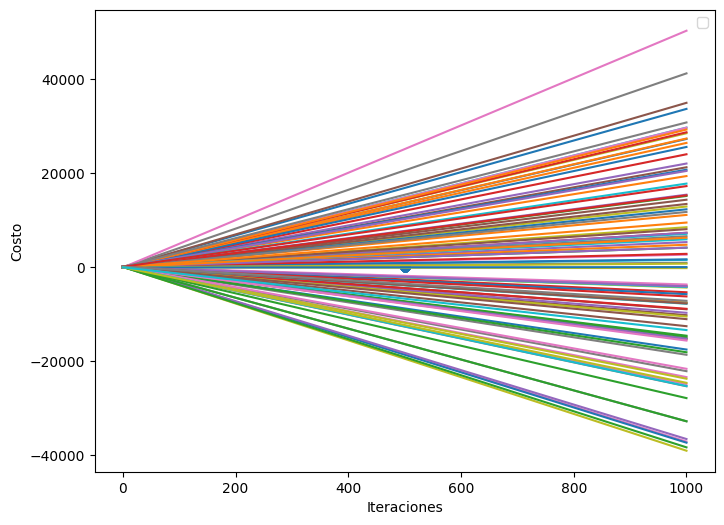

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(hist_x_gd)
plt.scatter(ancla, x_svd)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()

### Descenso por Gradiente con Regularización $L_2$

Se define la función de costo regularizada y su gradiente:

In [ ]:
        # if regularization == 'L2':
        #     grad = gradient(A, x, b) + 2 * delta2 * x

In [26]:
def F2(x, A, b, delta2):
    return F(x, A, b) + delta2 * np.linalg.norm(x) ** 2

def grad_F2(x, A, b, delta2):
    return grad_F(x, A, b) + 2 * delta2 * x 

El algoritmo de gradiente descendente regularizado se ejecuta similarmente: